###  Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
### Summary

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
### finding duplicated rows

df.duplicated().sum()

np.int64(0)

<Axes: >

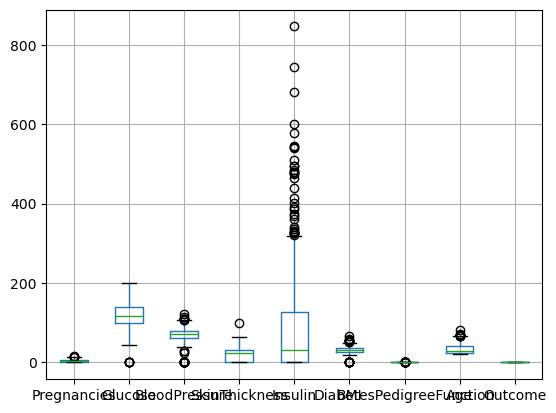

In [7]:
### Finding Outliers

df.boxplot()

In [8]:
### we dont remove the outliers because of the medical accuracy

<Figure size 1500x1000 with 0 Axes>

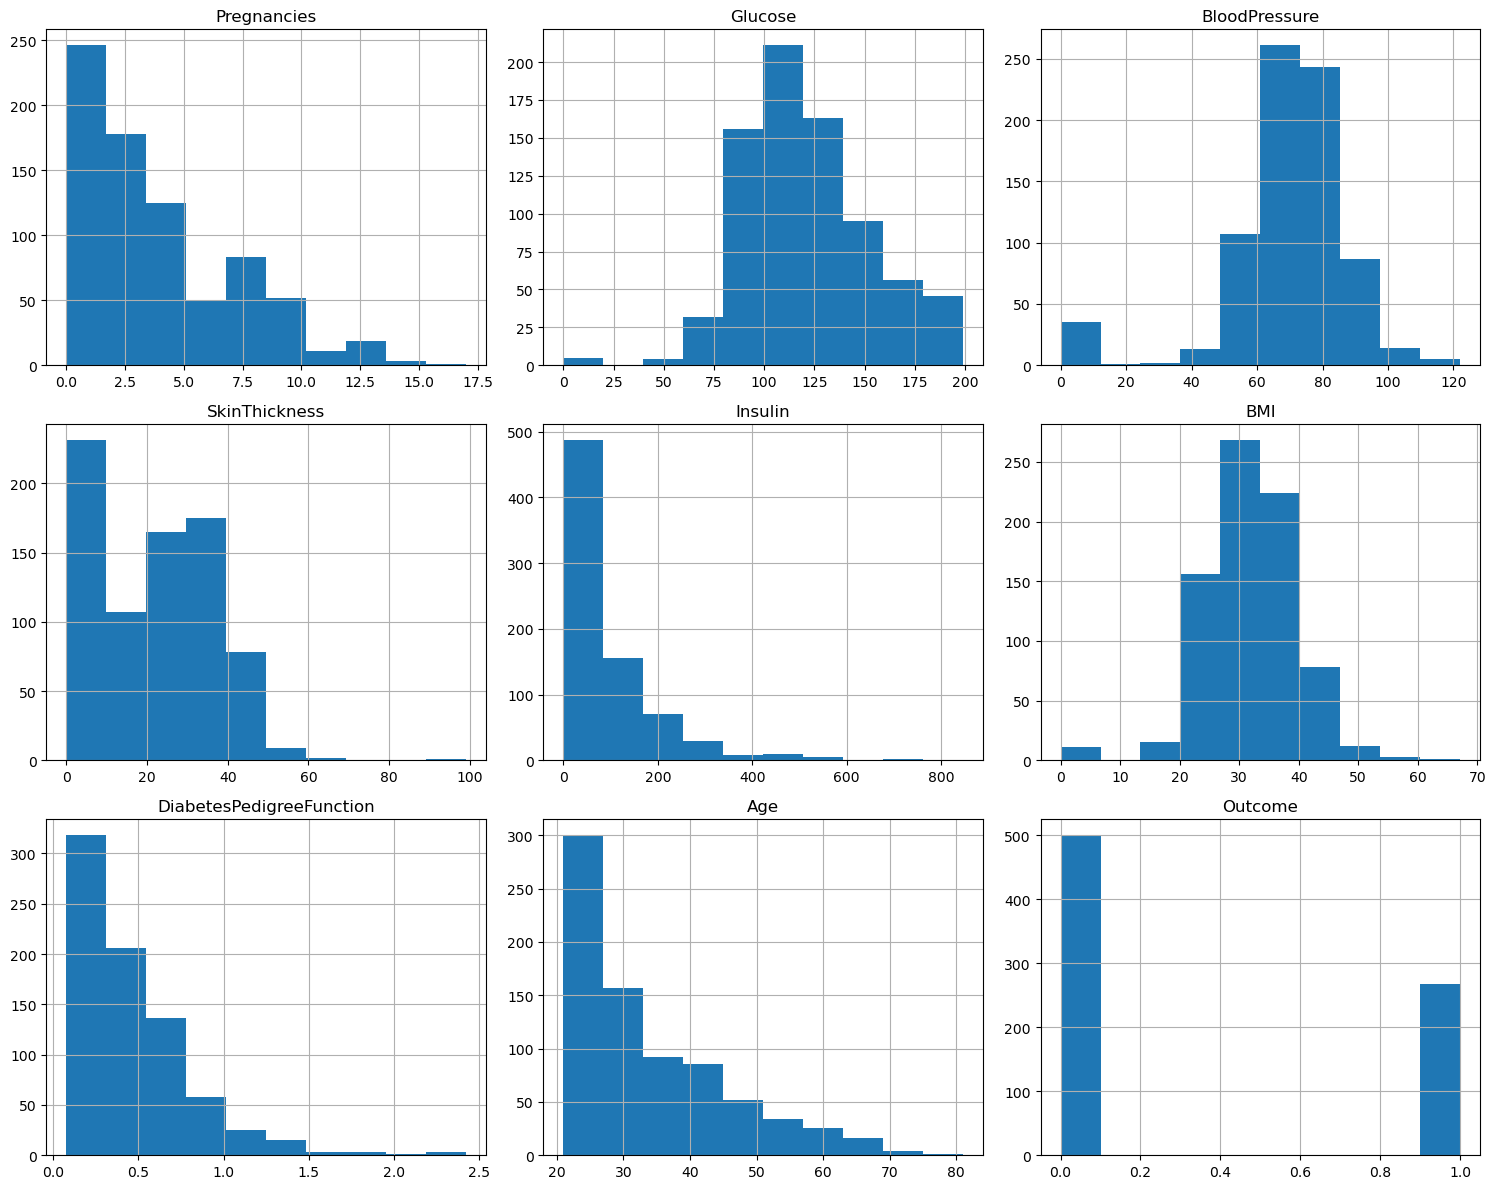

In [9]:
### Create visualizations

plt.figure(figsize=(15, 10))
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

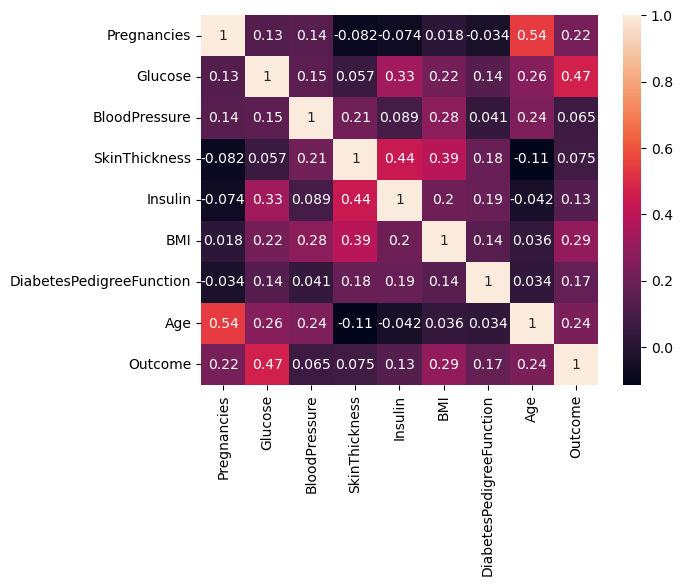

In [10]:
### correlation

corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
### by this analyis we conclude that every features is less relevant to the outcome execpt glucose and maybe BMI

### there is realtionship between insulin and skinthickness , age and pregnancies, BMI and skinthickness

### Data Preprocessing

In [12]:
### Handling Missing Values
### no null values but in 0 inthese col are medically incorrect value

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Count of zeros in specific columns:")
print((df[cols_with_zeros] == 0).sum())

Count of zeros in specific columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [13]:
### replacing 0 value with nan

df[cols_with_zeros] = df[cols_with_zeros].replace(0,np.nan)

In [14]:
df[cols_with_zeros].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [15]:
### by median imputation we achieve this

df[cols_with_zeros]=df[cols_with_zeros].fillna(df[cols_with_zeros].median())

In [16]:
df[cols_with_zeros].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

### Model Building

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
### seperate the target and feature

feature = df.drop(columns="Outcome")
target = df["Outcome"]

In [19]:
### train and test split

x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.7,random_state=150,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [20]:
### scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
### model building using logistic regression

log_model = LogisticRegression()

In [22]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
log_model.coef_

array([[ 0.45953839,  1.17174294, -0.02825096,  0.12795682, -0.18753206,
         0.63157132,  0.30419108,  0.01407616]])

In [24]:
log_model.intercept_

array([-0.87005399])

### Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [29]:
y_pred = log_model.predict(x_test)
y_prob = log_model.predict_proba(x_test)[:, 1]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [27]:
metrics = {
    print("Accuracy" ,accuracy_score(y_test, y_pred)),
    print("Precision" ,precision_score(y_test, y_pred)),
    print("Recall" ,recall_score(y_test, y_pred)),
    print("F1-score" ,f1_score(y_test, y_pred)),
    print("ROC-AUC" ,roc_auc_score(y_test, y_prob))
}

Accuracy 0.7532467532467533
Precision 0.6875
Recall 0.5432098765432098
F1-score 0.6068965517241379
ROC-AUC 0.8183539094650205


In [28]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [32]:
### visualize roc curve

auc_score = roc_auc_score(y_test,y_prob)
auc_score

np.float64(0.8183539094650205)

In [33]:
fpr,tpr,thr=roc_curve(y_test,y_prob)

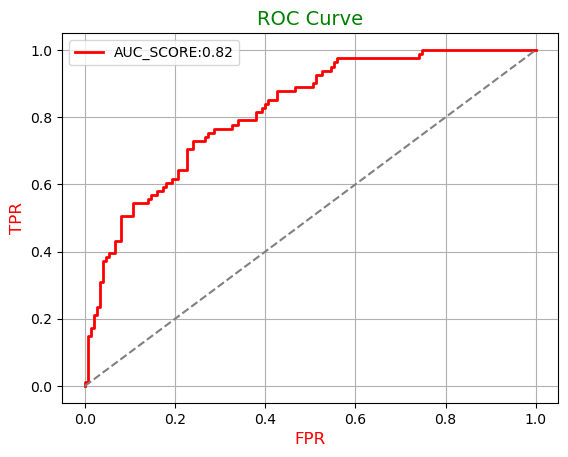

In [34]:
plt.plot(fpr,tpr,color='red',lw=2,label=f"AUC_SCORE:{auc_score:.2f}")
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',color='red',size=12)
plt.ylabel('TPR',color='red',size=12)
plt.title('ROC Curve',color='green',size=14)
plt.legend()
plt.grid()
plt.show()

### Model Deployment

In [36]:
import joblib

# Assuming your model is named 'log_model' and scaler is 'scaler'
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Files saved successfully!")

Files saved successfully!


### Interview Question